# Q1
(a) generate data from two classes as following:
- X1 = samp1(n)
- X2 = samp2(n)

choose n to be 200

In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
# matplotlib
plt.figure(figsize = (8,8))

In [2]:
import numpy as np

def samp1(n):
    """
    return n 2D samples from class 1
    :param n: number of samples
    :returns X: an ndarray with shape (n, 2)
    """
    r = np.random.uniform(0, 0.7, size=n)
    theta = np.random.uniform(0, np.pi/2, size=n)
    return np.vstack((r*np.cos(theta), r*np.sin(theta))).T

def samp2(n):
    """
    return n 2D samples from class 2
    :param n: number of samples
    :returns X: an ndarray with shape (n, 2)
    """
    r = np.random.uniform(0.9, 1, size=n)
    theta = np.random.uniform(0, np.pi/2, size=n)
    return np.vstack((r*np.cos(theta), r*np.sin(theta))).T


In [3]:
N = 200
X1 = samp1(N)
X2 = samp2(N)

(b) draw scatter plot of X1 and X2 and mark them by different colors

Text(0.5,1,'class 1 in red class 2 blue')

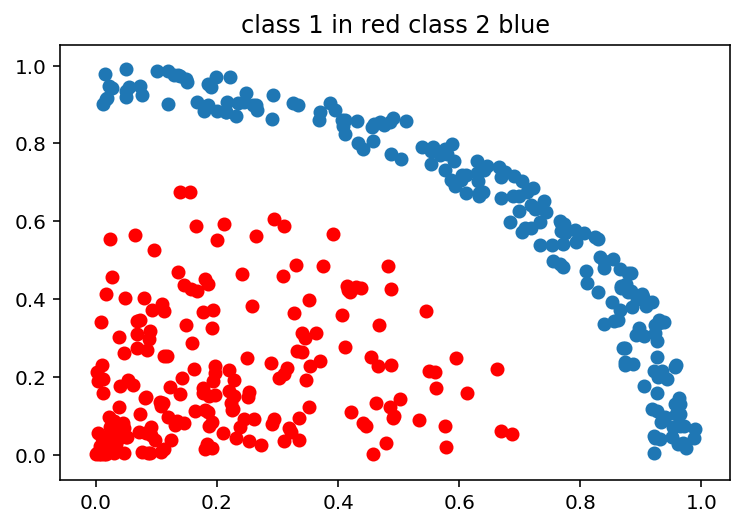

In [4]:
plt.scatter(X1[:,0],X1[:,1], color = "red")
plt.scatter(X2[:,0],X2[:,1])
plt.title("class 1 in red class 2 blue")

(c) create vectors of labels for X1 and X2 (Y1, Y2 respectively) using np.ones((n)) and -np.ones((n))

In [5]:
y1 = np.ones((N))
y2 = -np.ones((N))

(d) create data matrix X by vertically concatenating X1 and X2. create label vector Y by horizontally concatenating Y1 and Y2.

In [6]:
X = np.vstack((X1, X2))
y = np.hstack((y1,y2))

(e) call function train_lin_classifier with arguments X and Y to get linear classifier.

In [7]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [89]:
from sklearn.linear_model import perceptron


def train_lin_classifier(X_, Y_, weights=None):
    """
    linear classifier
    :param X_: data - numpy array (n_samples, n_features)
    :param Y_: labels - numpy array (n_samples, )
    :param weights: sample weights - numpy array (n_samples, )
    :returns w: coefficient - numpy array (n_features, 1)
    :returns b: intercept - scalar
    """
    
    clf = perceptron.Perceptron(max_iter=20)
    clf.fit(X_, Y_, sample_weight=weights)
    return clf.coef_.T, clf.intercept_

In [90]:
train_lin_classifier(X, y)

(array([[-9.38477457],
        [-9.38658824]]), array([ 9.]))

(f) use sign function and linear classifier to generate predictions for the data. draw a scatter plot for the data. mark correctly classified points by a circle and incorrectly classified points by a '+' sign.

In [103]:
eq = train_lin_classifier(X, y)
c_1 = eq[0][0]
c_2 = eq[0][1]
b = eq[1]
y_pred = np.sign((c_1*X[:,0]) + c_2*X[:,1] + b)

In [104]:
X1.shape

(200, 2)

Text(0.5,1,'red class 1 blue class 2')

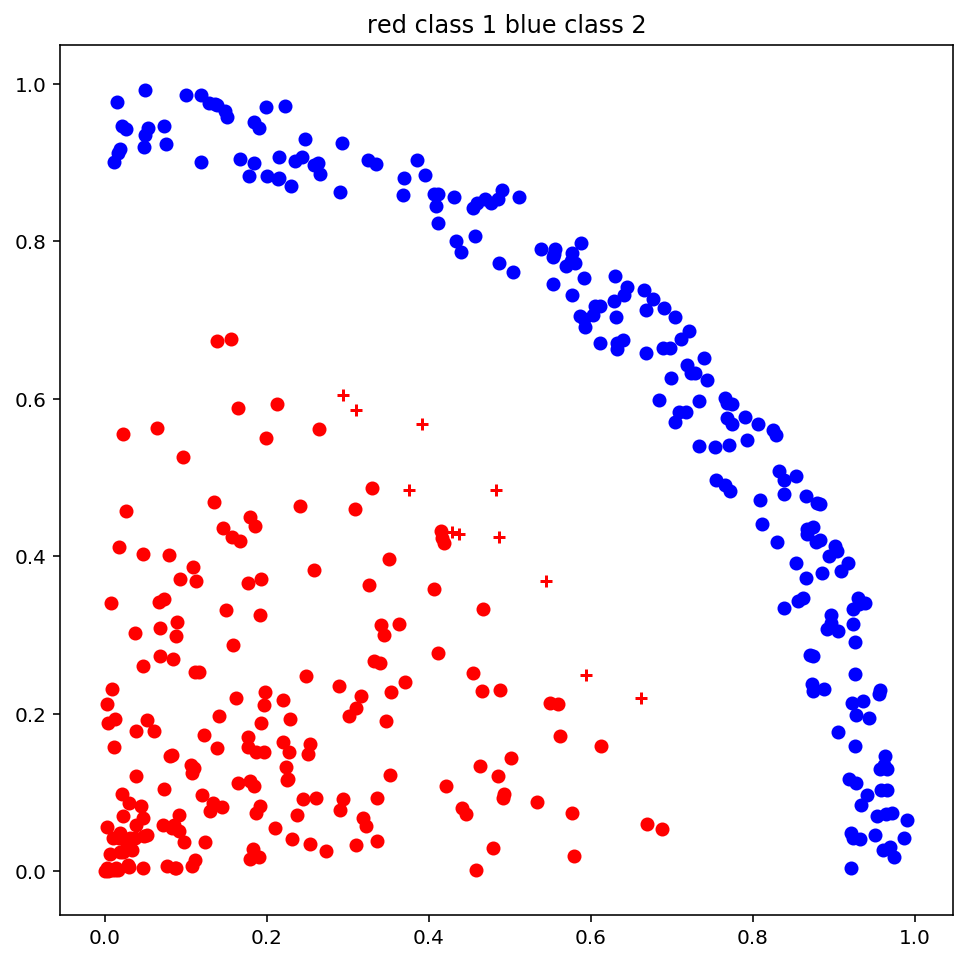

In [113]:
def plot_y_pred(X, y, y_pred):
    f, ax = plt.subplots(figsize=(8,8))
    for i in np.arange(0,len(y_pred)):
        if i < 200:
            if y_pred[i] == y[i]:
                ax.scatter(X[i,0],X[i,1], marker = "o", color = "red")
            else:
                ax.scatter(X[i,0],X[i,1], marker = "+", color = "red")
        else:
            if y_pred[i] == y[i]:
                ax.scatter(X[i,0],X[i,1], marker = "o", color = "blue")
            else:
                ax.scatter(X[i,0],X[i,1], marker = "+", color = "blue")
                
    return ax  
            #, color = y_pred[i])
y_pred_plot = plot_y_pred(X, y , y_pred)
y_pred_plot.set_title("red class 1 blue class 2")

<IPython.core.display.Javascript object>


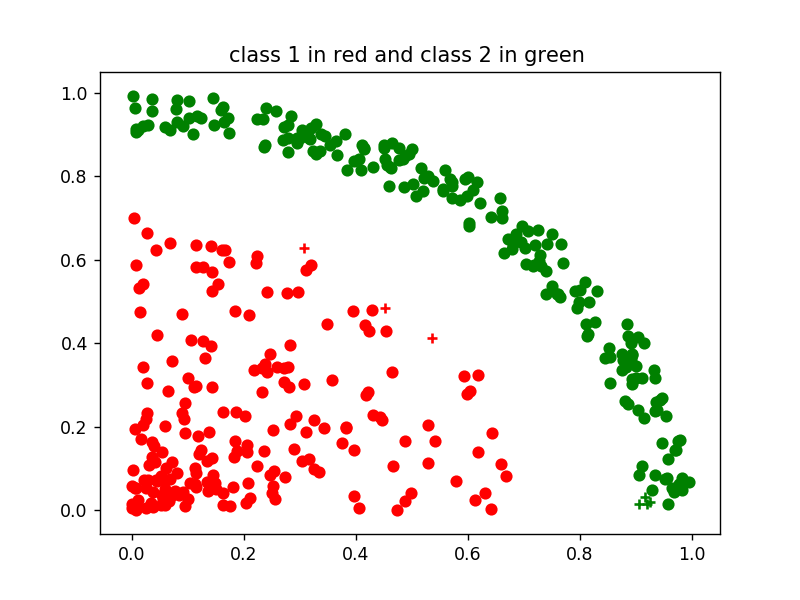

# Q2
(a) implement bagging for the scenario described in question 1. try bagging with different numbers of bootstrap samples. plot scatter plots of your results

In [94]:
sample_indexes = np.random.choice(np.arange(len(X)), 100)
    
y[sample_indexes]

array([-1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1., -1., -1.,  1.,  1., -1.,  1., -1., -1.])

In [95]:
eq_list[:,2]

array([ 5.,  4.,  2.,  6.,  5.,  6.,  3.,  3.,  6.,  5.])

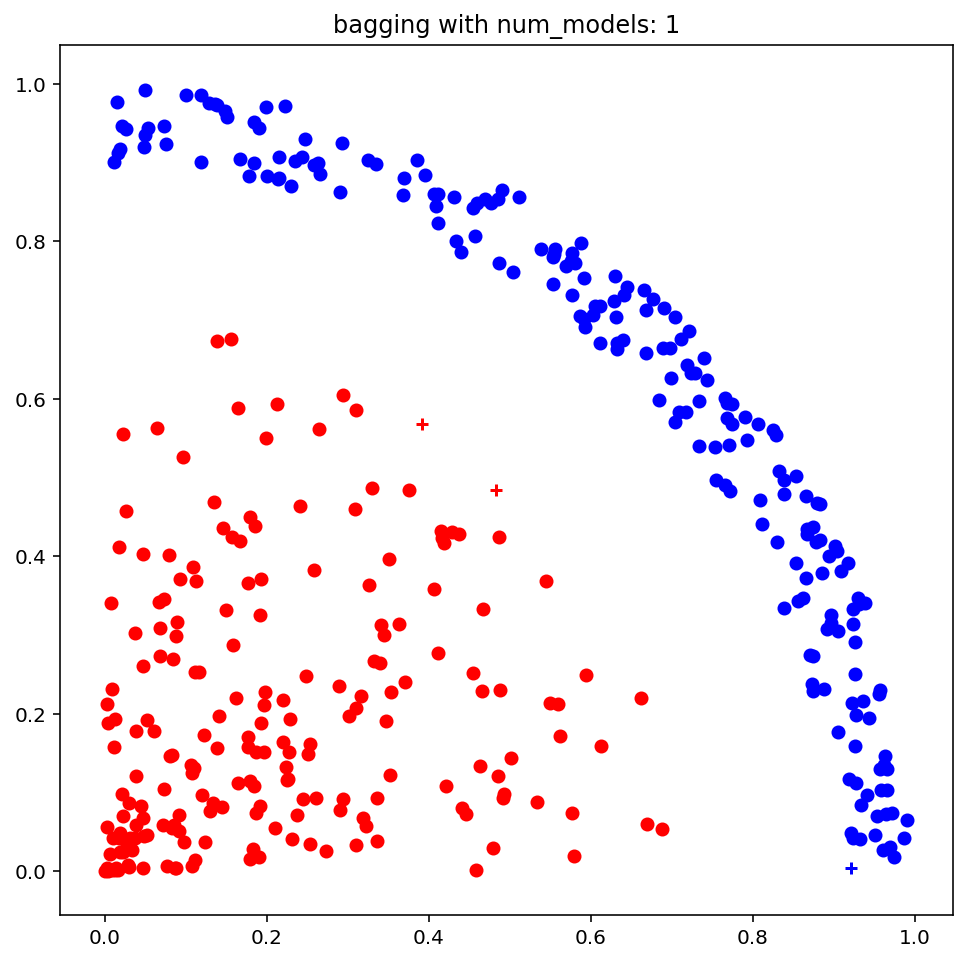

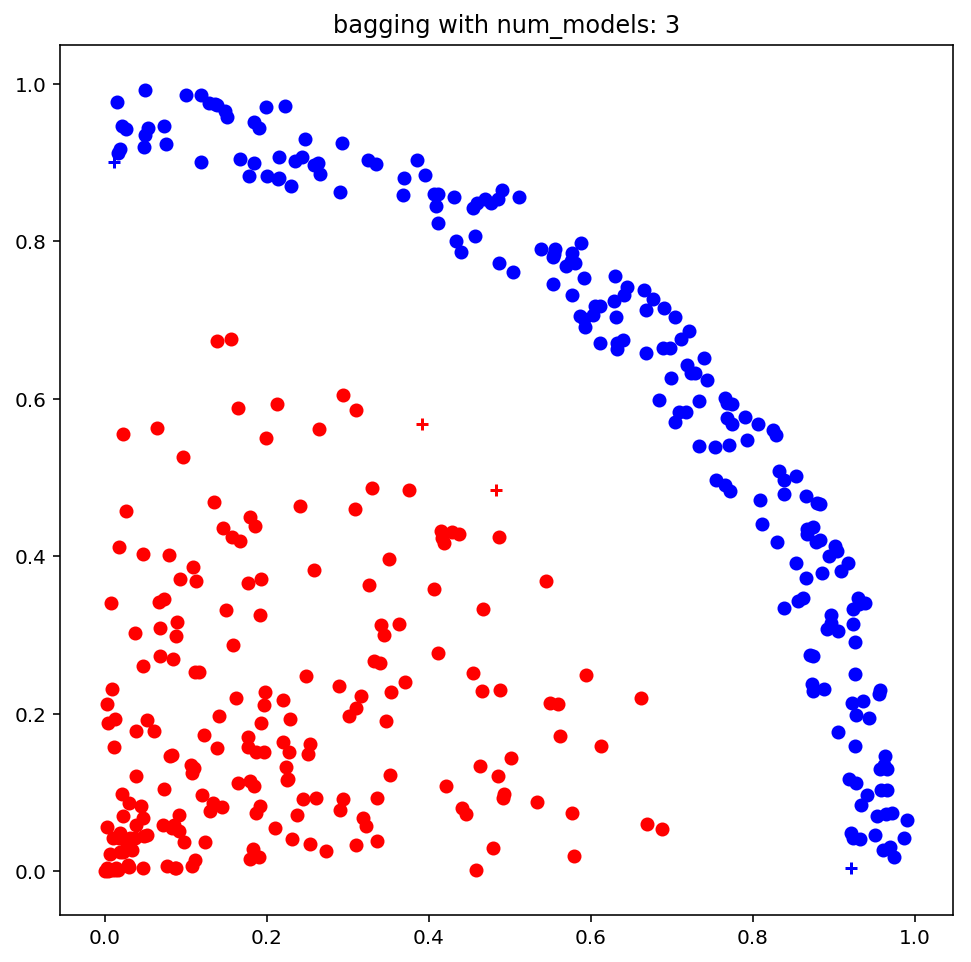

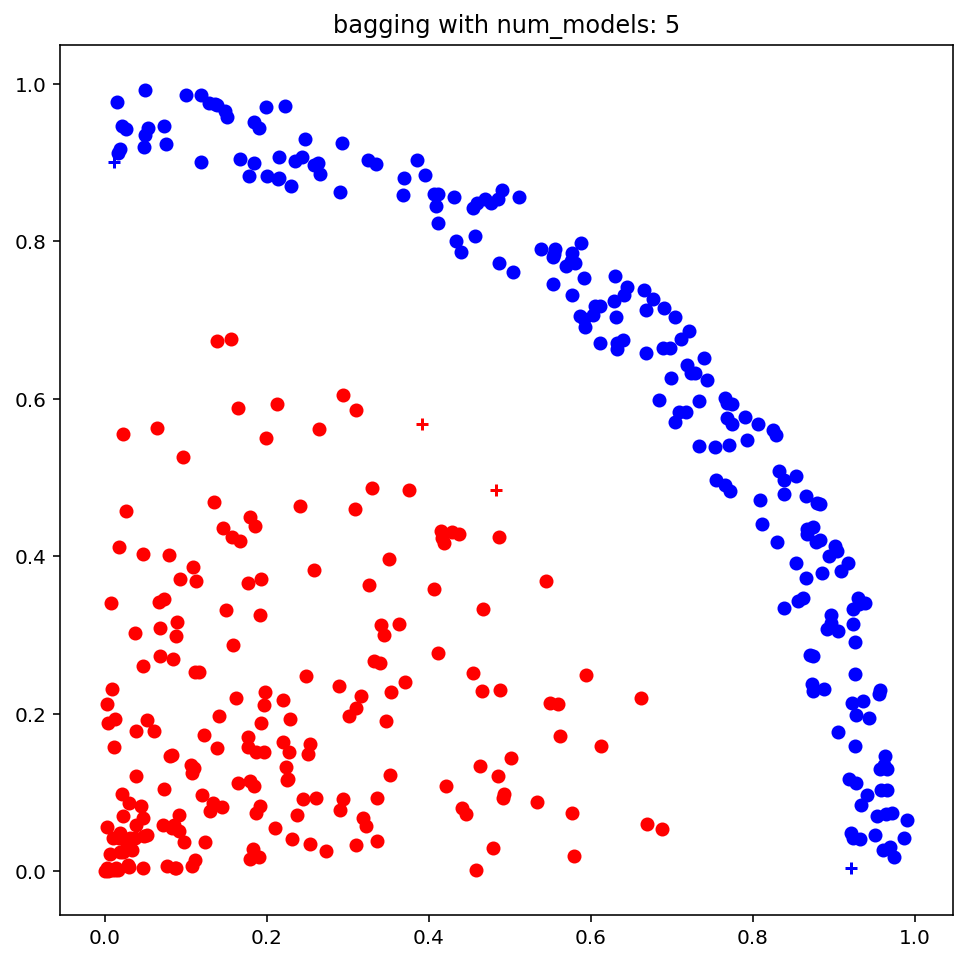

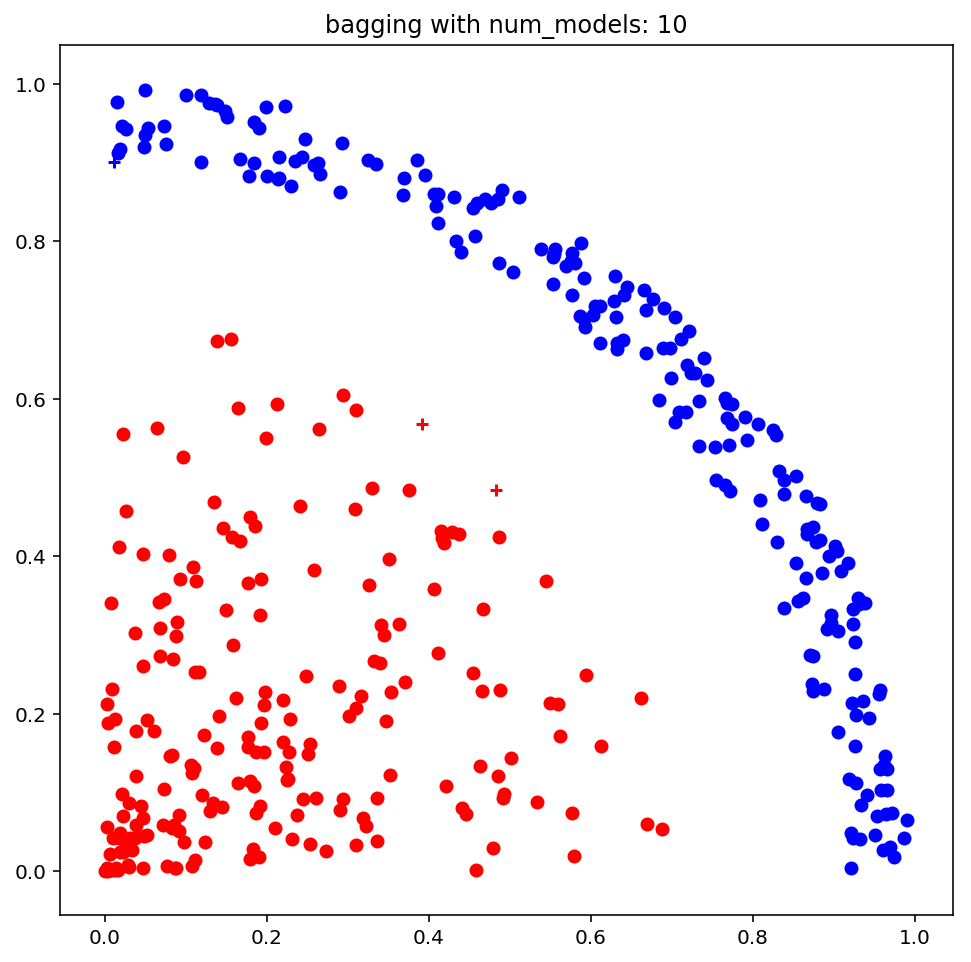

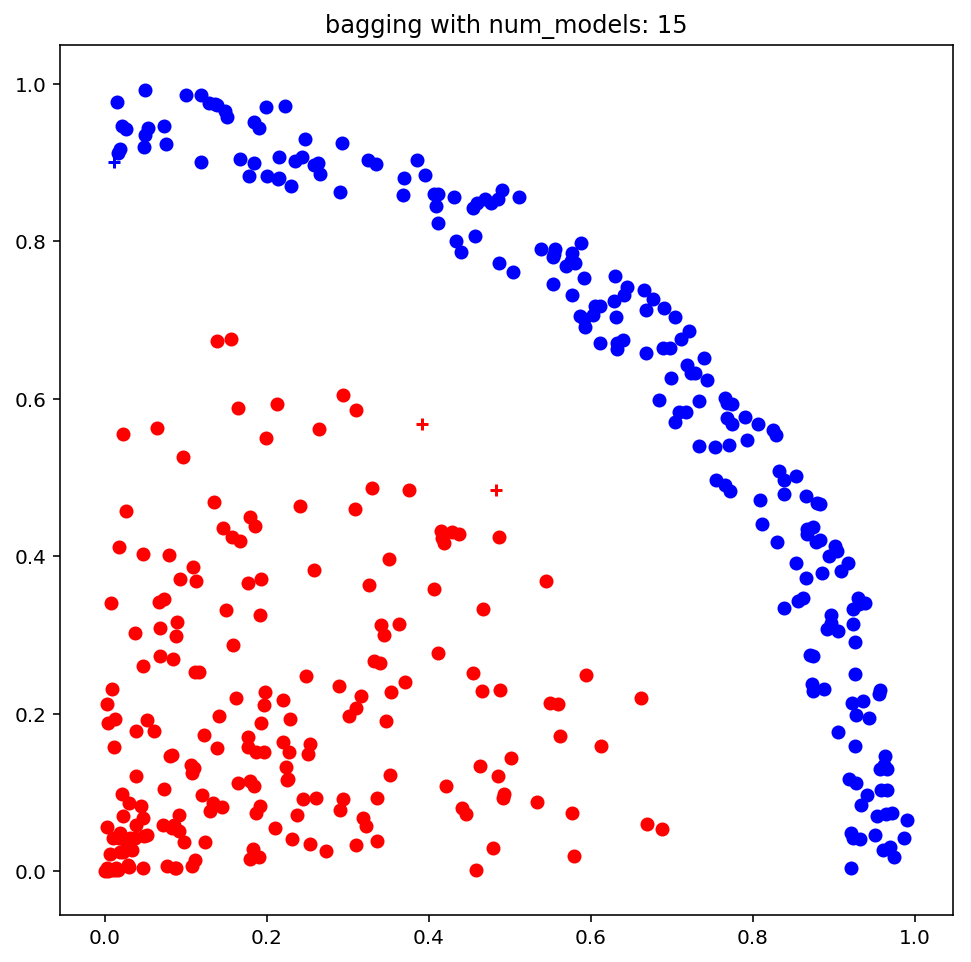

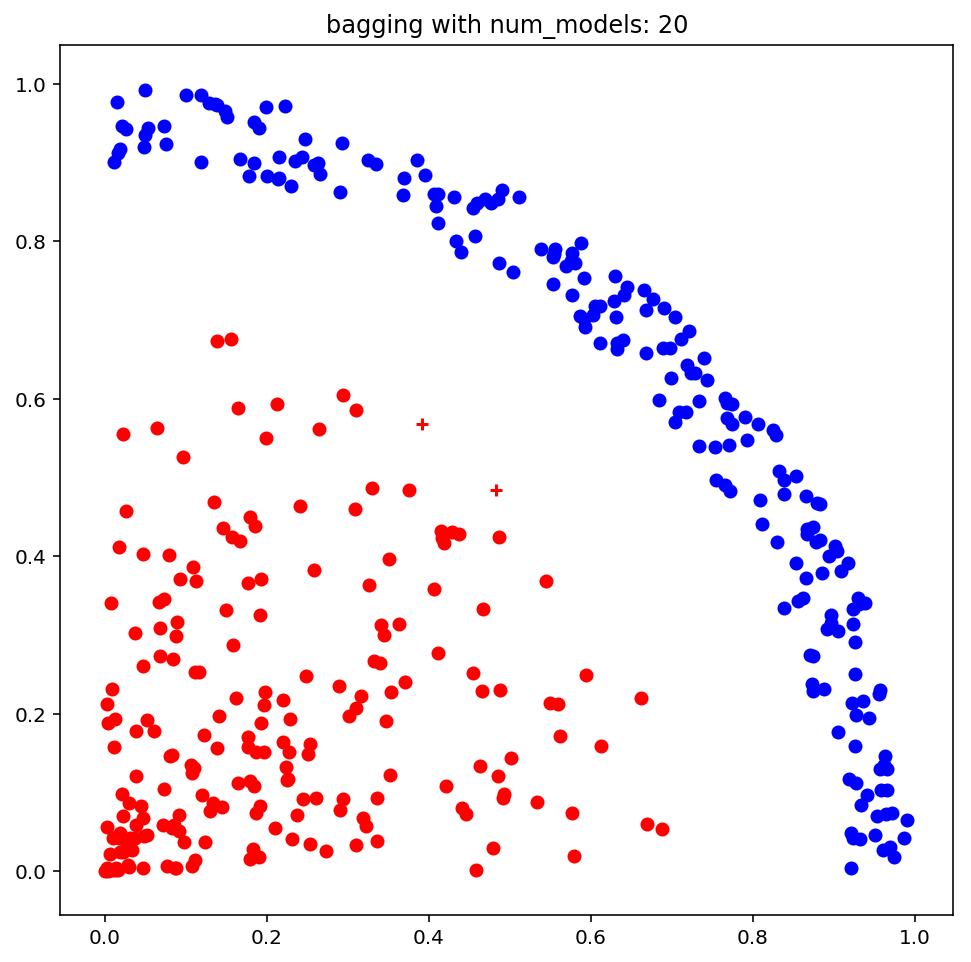

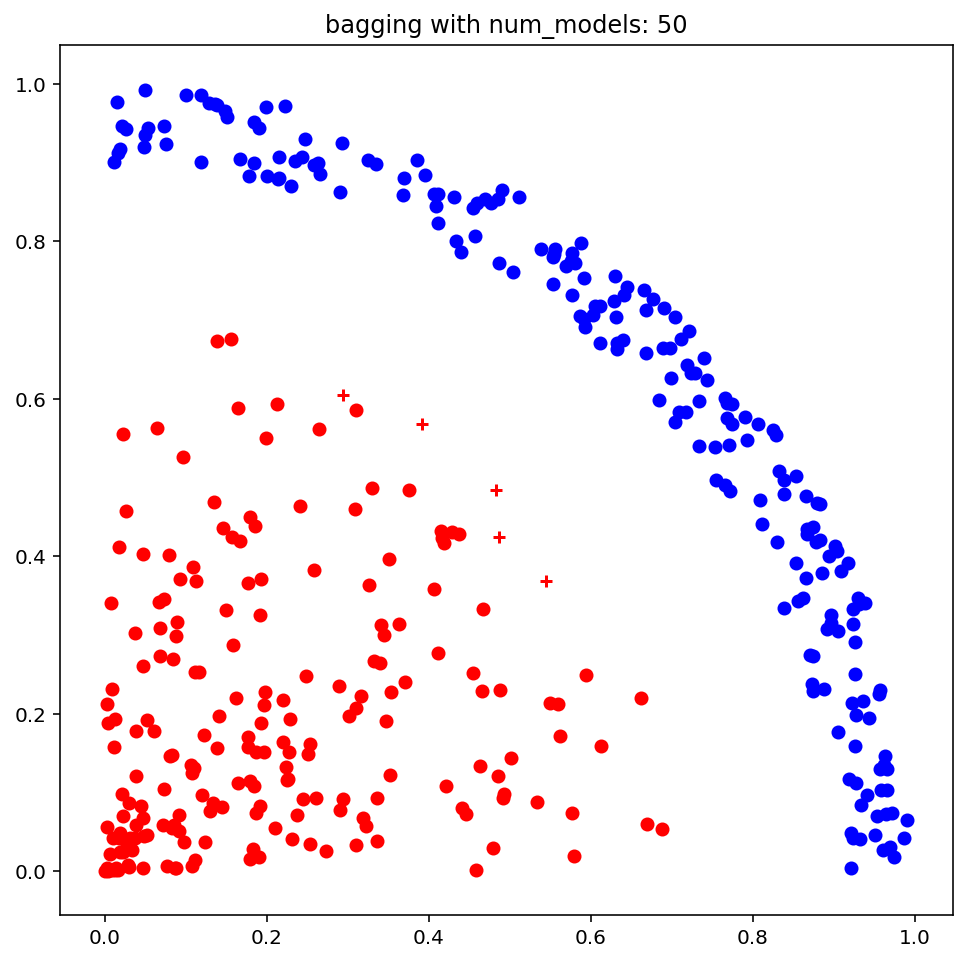

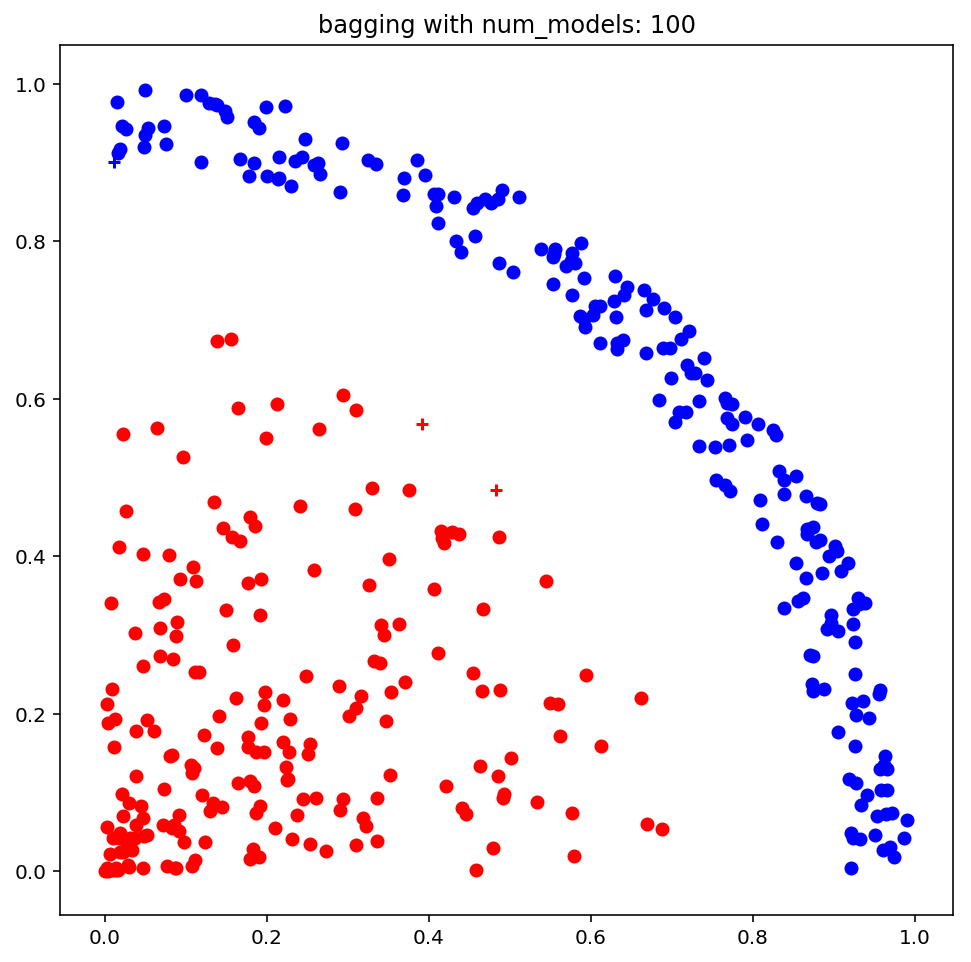

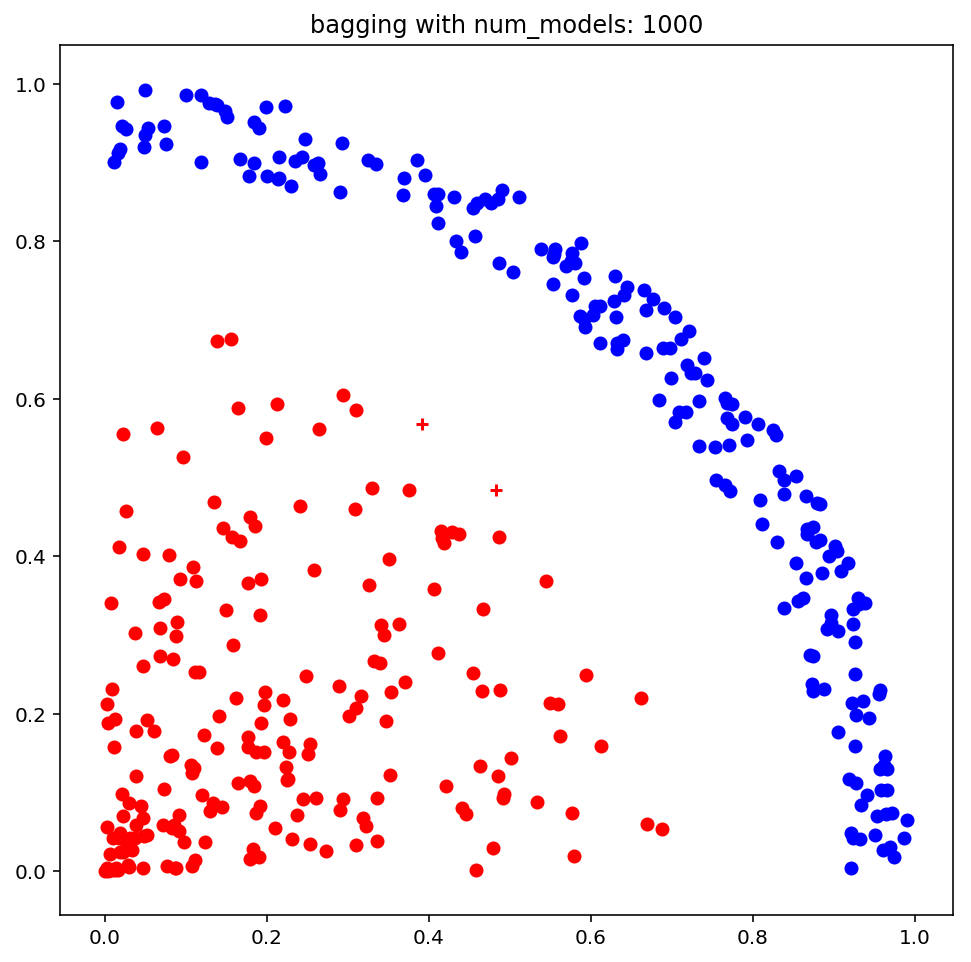

In [138]:

def bagging_model(num_models, num_samples):
    N = len(y)

    eq_list = np.empty((num_models,3))#np.zeros((num_models,2))
    for i in range(num_models): 
        sample_indexes = np.random.choice(np.arange(N), num_samples)
        eq = train_lin_classifier(X[sample_indexes],y[sample_indexes])
        c_1 = eq[0][0]
        c_2 = eq[0][1]
        b = eq[1]
        
        eq_list[i] = [c_1, c_2, b]
        
    c_1_avg = np.mean(eq_list[:,0])
    c_2_avg = np.mean(eq_list[:,1])
    b_avg = np.mean(eq_list[:,2])
    
    #print (eq_list, c_1_avg)
    
    y_pred = np.sign((c_1_avg*X[:,0]) + c_2_avg*X[:,1] + b_avg)
    return y_pred
    
for num_models in [1,3,5,10,15,20, 50, 100, 1000]:
    y_pred = bagging_model(num_models, 200)
    y_pred_plot = plot_y_pred(X, y , y_pred)
    y_pred_plot.set_title("bagging with num_models: %s" %num_models)


<IPython.core.display.Javascript object>


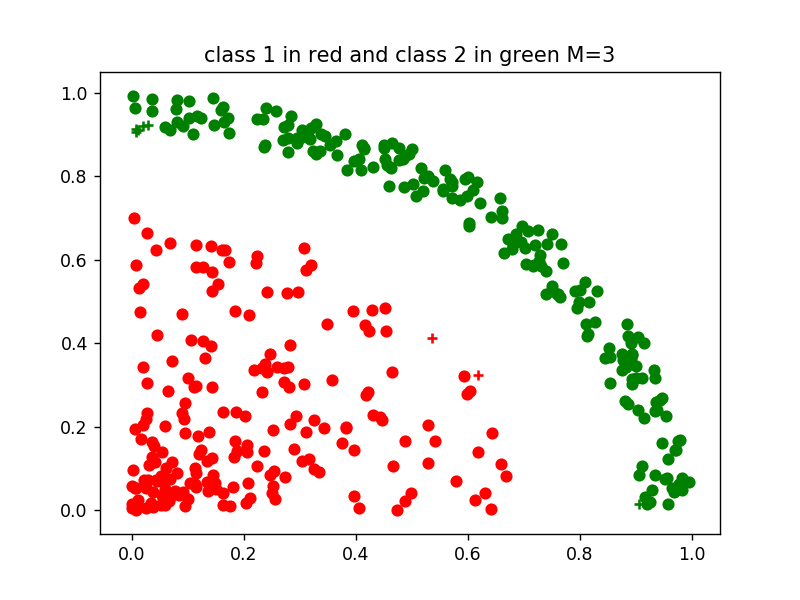

<IPython.core.display.Javascript object>


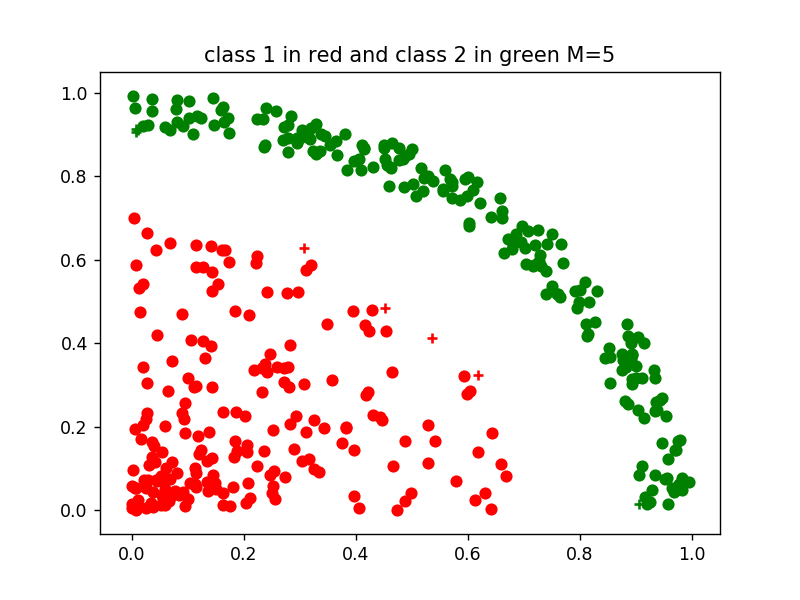

<IPython.core.display.Javascript object>


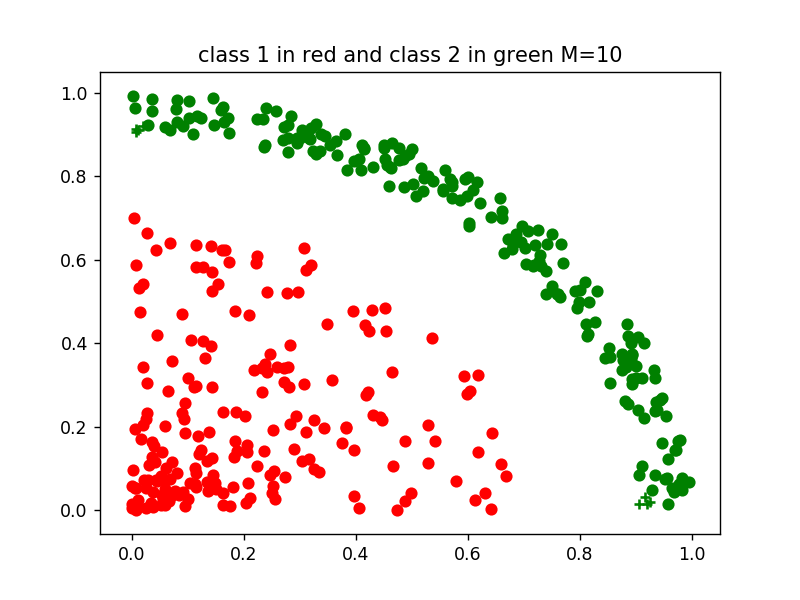

In [10]:
eq = train_lin_classifier(X, y)
c_1 = eq[0][0]
c_2 = eq[0][1]
b = eq[1]
y_pred = np.sign((c_1*X[:,0]) + c_2*X[:,1] + b)

(b) implement AdaBoost for the scenario described in question 1. try AdaBoost with different numbers of base classifiers. plot scatter plots of your results.

In [129]:

def adaboost(num_models, num_samples):
    N = len(y)
    
    eq_list = np.empty((num_models,4))#np.zeros((num_models,2))
    for i in range(num_models): 
        sample_indexes = np.random.choice(np.arange(N), num_samples)
        eq = train_lin_classifier(X[sample_indexes],y[sample_indexes])
        c_1 = eq[0][0]
        c_2 = eq[0][1]
        b = eq[1]
        
        y_pred = np.sign((c_1*X[:,0]) + c_2*X[:,1] + b)
        loss = (sum(y_pred == y) - N) / N
        #(len(y_pred) - sum(y_pred == y)) / len(y_pred)
        
        eq_list[i] = [c_1, c_2, b, loss]
    
    print (eq_list)
    
    y_pred = np.sign((c_1*X[:,0]) + c_2*X[:,1] + b)
    #return y_pred

adaboost(5, 200)
# for num_models in [1,3,5,10,15,20, 50, 100]:
#     y_pred = bagging_model(num_models, 200)
#     y_pred_plot = plot_y_pred(X, y , y_pred)
#     y_pred_plot.set_title("bagging with num_models: %s" %num_models)


[[ -7.31558830e+00  -7.08755158e+00   7.00000000e+00  -2.00000000e-02]
 [ -6.75169708e+00  -7.11261837e+00   6.00000000e+00  -2.00000000e-02]
 [ -6.31497213e+00  -6.69643849e+00   6.00000000e+00  -7.50000000e-03]
 [ -8.38772948e+00  -7.52833046e+00   7.00000000e+00  -2.00000000e-02]
 [ -4.09272149e+00  -4.14252881e+00   4.00000000e+00  -1.75000000e-02]]


In [116]:
sum(y == y_pred)

389

# Q3
(a) whats wrong with the learning procedure we performed in question 1?

not segmenting the data into train and test

(b) [bonus] why is this violation not as severe for the procedure you performed in question 2.a?

(c) can you tell what is the ideal number of base classifiers for boosting in this case? do you need to specify it in advance?

(d) can you suggest a modification to bagging to make it perform better in this case? explain your idea, implement your suggestion and plot the results.

<IPython.core.display.Javascript object>


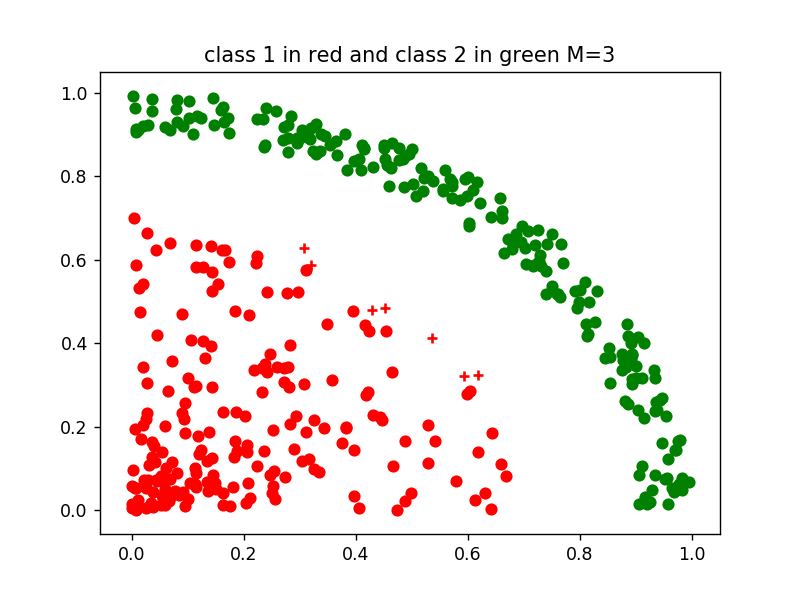

<IPython.core.display.Javascript object>


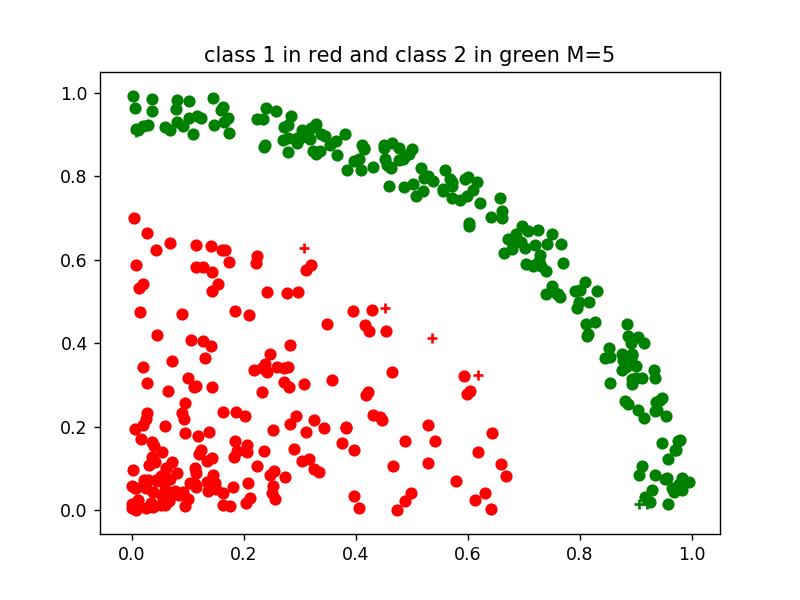

<IPython.core.display.Javascript object>


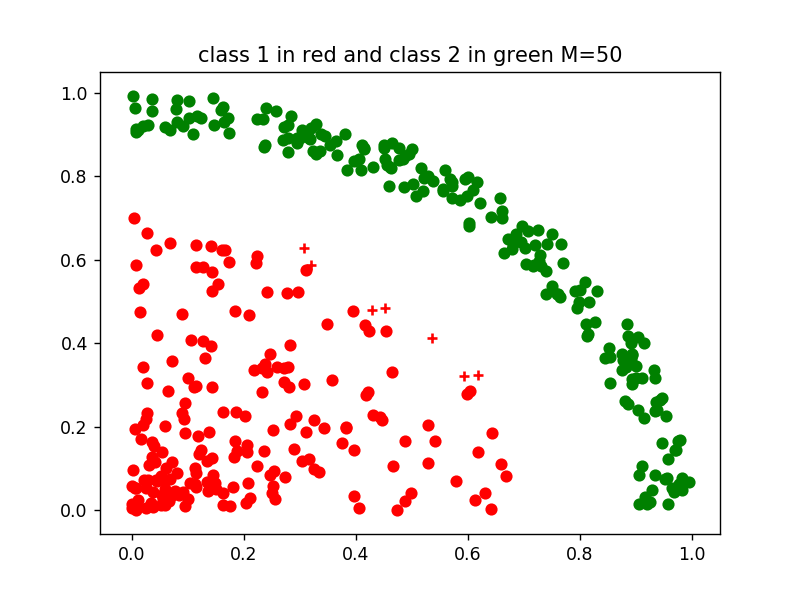